In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import networkx as nx

In [26]:
beta = 0.8
gamma = 0.4
I0_test = [0.01]+[0]*4 # infect node 0 with 0.01, and nobody else to start
print(I0_test)
A = np.zeros([5,5])
A[0:4,1:5] = np.eye(4)
A[4,0] = 1
print(A)

[0.01, 0, 0, 0, 0]
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


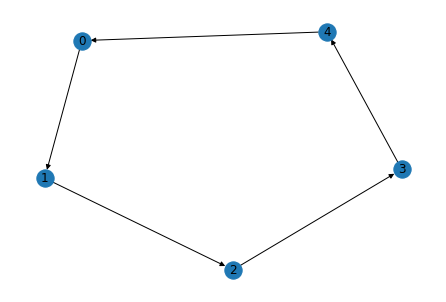

In [3]:
G = nx.from_numpy_array(A,create_using=nx.DiGraph)
nx.draw(G, with_labels=True)

In [4]:
def SIR(beta,gamma,A,I0,timesteps) :
  ''' 
  Notes: 
    - assumes that everything is dimensioned correctly
    - all S/I/R are fractions of node's population
    - R0 = 0
    - S0 = 1-I0
  '''
  n = A.shape[0]

  # initialize:
  SS = np.zeros([n,timesteps]) # each column in a list of S_i's; there is one column per timestep
  II = np.zeros_like(SS) # copy the shape of SS to create II
  RR = np.zeros_like(SS) # nobody starts out with immunity
  II[:,0] = I0 # set the initial infection
  SS[:,0] = np.ones(n)-II[:,0] # if you're not infected, you're susceptible

  for t in range(1,timesteps):
    bigS = np.diag(SS[:,t-1])
    new_infections = beta * bigS @ A @ II[:,t-1]
    heals = gamma*II[:,t-1]
    SS[:,t] = SS[:,t-1] - new_infections
    II[:,t] = II[:,t-1] + new_infections - heals
    RR[:,t] = RR[:,t-1] + heals
  return SS,II,RR

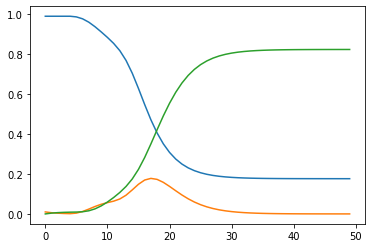

In [5]:
SSt,IIt,RRt = SIR(beta,gamma,A,I0_test,50)
plt.plot(SSt[0,:]) # just plot node 0's susceptible over time
plt.plot(IIt[0,:]) # just plot node 0's infection over time
plt.plot(RRt[0,:]) # just plot node 0's recovery over time

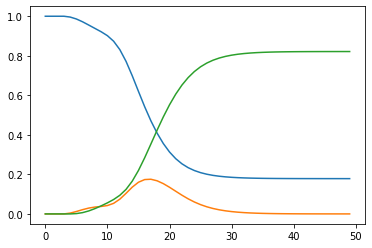

In [6]:
plt.plot(SSt[1,:]) # just plot node 1's susceptible over time
plt.plot(IIt[1,:]) # just plot node 1's infection over time
plt.plot(RRt[1,:]) # just plot node 1's recovery over time

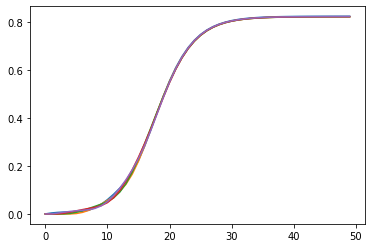

In [7]:
plt.plot(RRt.T) # now plot everybody's

In [8]:
RRt[:,-1] # every node's final total # of infections

array([0.82355168, 0.82146706, 0.82134887, 0.82164294, 0.82233012])

In [9]:
A

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [10]:
A2 = A.copy()
A2[0,1:] = np.ones(4)/4 # give node 1 an equal edge to everybody
A2

array([[0.  , 0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

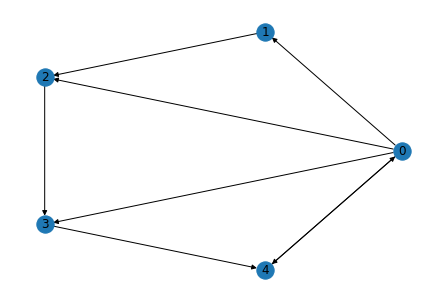

In [11]:
G2 = nx.from_numpy_array(A2,create_using=nx.DiGraph)
nx.draw_circular(G2, with_labels=True)

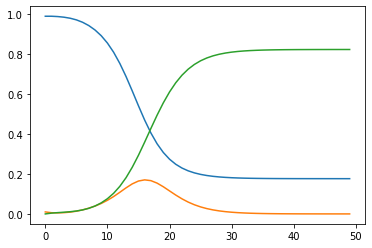

In [12]:
SS2t,II2t,RR2t = SIR(beta,gamma,A2,I0_test,50)
plt.plot(SS2t[0,:]) # just plot node 0's susceptible over time
plt.plot(II2t[0,:]) # just plot node 0's infection over time
plt.plot(RR2t[0,:]) # just plot node 0's recovery over time

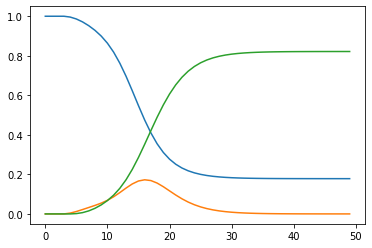

In [13]:
plt.plot(SS2t[1,:]) # just plot node 1's susceptible over time
plt.plot(II2t[1,:]) # just plot node 1's infection over time
plt.plot(RR2t[1,:]) # just plot node 1's recovery over time

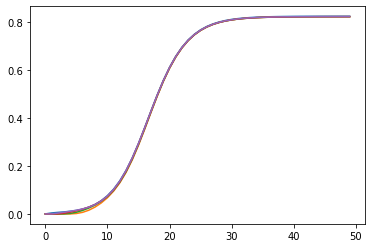

In [14]:
plt.plot(RR2t.T) # now plot everybody's

In [15]:
RR2t[:,-1] # every node's final total # of infections

array([0.82346113, 0.82162244, 0.82157395, 0.82170355, 0.82217958])

In [16]:
A3 = A2.copy()
A3[4,:] *= 0.5
A3

array([[0.  , 0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.5 , 0.  , 0.  , 0.  , 0.  ]])

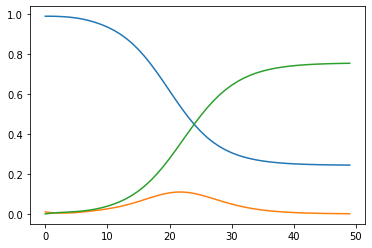

In [17]:
SS3t,II3t,RR3t = SIR(beta,gamma,A3,I0_test,50)
plt.plot(SS3t[0,:]) # just plot node 0's susceptible over time
plt.plot(II3t[0,:]) # just plot node 0's infection over time
plt.plot(RR3t[0,:]) # just plot node 0's recovery over time

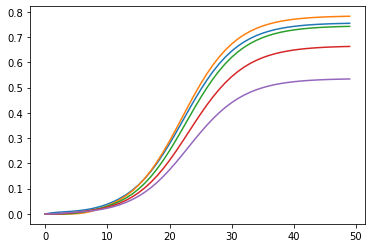

In [18]:
plt.plot(RR3t.T) # plot everybody's

In [19]:
RR3t[:,-1]

array([0.75451097, 0.78244143, 0.74239048, 0.66289157, 0.53414606])

In [20]:
A4 = A2.copy()
A4[0,3:5] = [0,0]
A4

array([[0.  , 0.25, 0.25, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

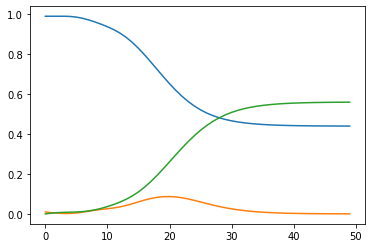

In [21]:
SS4t,II4t,RR4t = SIR(0.8,0.4,A4,I0_test,50)
plt.plot(SS4t[0,:]) # just plot node 0's susceptible over time
plt.plot(II4t[0,:]) # just plot node 0's infection over time
plt.plot(RR4t[0,:]) # just plot node 0's recovery over time

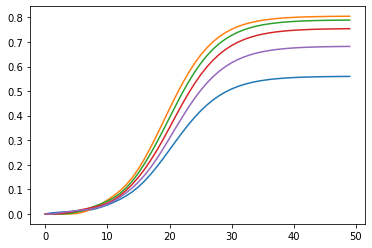

In [22]:
plt.plot(RR4t.T) # plot everybody's

In [23]:
RR4t[:,-1] # everybody's infection at the end

array([0.55966019, 0.80456446, 0.78897254, 0.75384531, 0.68173996])